In [1]:
# Import package
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# unzip
import zipfile
import os

In [2]:
# Authenticating With API Server
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
# downoad single file
data = 'ntnu-testimon/paysim1'
file = 'PS_20174392719_1491204439457_log.csv'
path = '../Data/'
#Signature: dataset_download_file(dataset, file_name, path=None, force=False, quiet=True)
api.dataset_download_file(dataset=data,file_name=file,path=path,force=True,quiet=False)

  2%|▏         | 3.00M/178M [00:00<00:07, 24.4MB/s]

100%|██████████| 178M/178M [00:07<00:00, 25.8MB/s] 

True

In [4]:
# Unzip
with zipfile.ZipFile(path+'PS_20174392719_1491204439457_log.csv.zip', mode='r') as unzipit:
    unzipit.extractall(path=path)
# Delete ZIP file
os.remove(path+'PS_20174392719_1491204439457_log.csv.zip')

In [5]:
paysim = pd.read_csv(path+file)

In [6]:
paysim.shape

(6362620, 11)

In [7]:
paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
paysim.isnull().values.any()

False

In [9]:
# Determine Null values
paysim.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
# rename type, is a reserved python word & inconsistent column name 
paysim.rename(columns={'type':'transType', 'oldbalanceOrg': 'oldbalanceOrig'}, inplace=True)
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
paysim['transType'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: transType, dtype: int64

In [12]:
#  isFraud column has 1 or 0 ONLY
paysim[~paysim['isFraud'].isin([1, 0])]

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [13]:
print("Total Record Count: " + str(paysim.isFraud.count()))
print("Total Non-Fraud Count: " + str(paysim.query('isFraud == 0').isFraud.count()))
print("Total Fraud Count: " + str(paysim.query('isFraud == 1').isFraud.count()))

Total Record Count: 6362620
Total Non-Fraud Count: 6354407
Total Fraud Count: 8213


<AxesSubplot:>

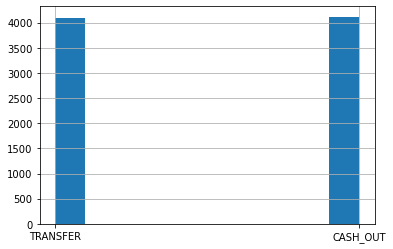

In [14]:
# Frauds are in Transfer and cash Out
fraud = paysim[paysim.isFraud == 1]
fraud.transType.hist()

<AxesSubplot:>

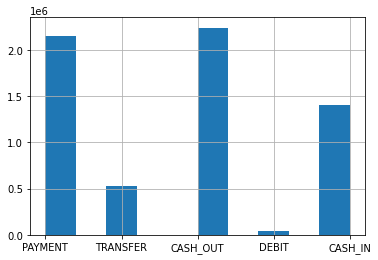

In [15]:
paysim.transType.hist()